# Plotting data directly with pandas

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [37]:
#make a dataframe
car_sales = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/git ml/matplotlib/car-sales.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [23]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2020', periods=(1000)))
ts

2020-01-01    0.369926
2020-01-02    0.857213
2020-01-03    0.086414
2020-01-04   -0.879871
2020-01-05   -0.270807
                ...   
2022-09-22   -0.031615
2022-09-23    0.787786
2022-09-24   -0.499322
2022-09-25   -0.686827
2022-09-26   -1.141083
Freq: D, Length: 1000, dtype: float64

In [25]:
# What does cumsum() do? (cumulative sum, adding previous number with current number!)
ts.cumsum()

2020-01-01     0.369926
2020-01-02     1.227138
2020-01-03     1.313552
2020-01-04     0.433681
2020-01-05     0.162874
                ...    
2022-09-22    21.610895
2022-09-23    22.398681
2022-09-24    21.899359
2022-09-25    21.212532
2022-09-26    20.071449
Freq: D, Length: 1000, dtype: float64

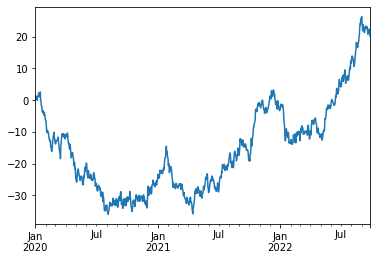

In [30]:
ts.cumsum().plot();

# Working with actual data

In [38]:
# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]','')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [39]:
#removing last 2 zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [41]:
type(car_sales["Price"][0])

str

In [43]:
#converting string to int
car_sales["Price"] = car_sales["Price"].astype(int)
type(car_sales["Price"][0])

numpy.int32

In [44]:
#add column
car_sales["sale date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,sale date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [45]:
# Make total sales column
car_sales["Total sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,sale date,Total sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


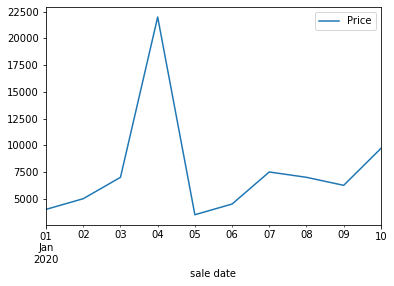

In [47]:
car_sales.plot(y="Price", x="sale date")

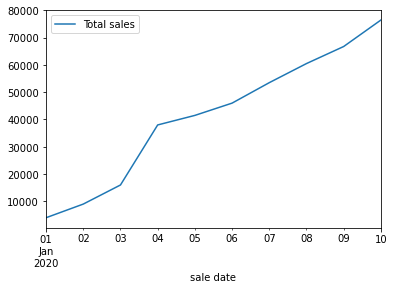

In [48]:
car_sales.plot(x="sale date", y="Total sales")

## Scatter

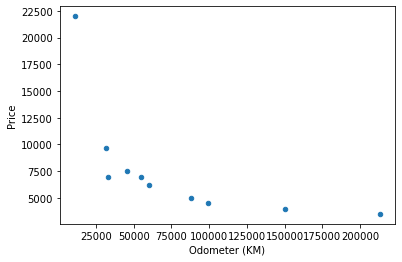

In [49]:
car_sales.plot(x="Odometer (KM)",y="Price",kind="scatter")

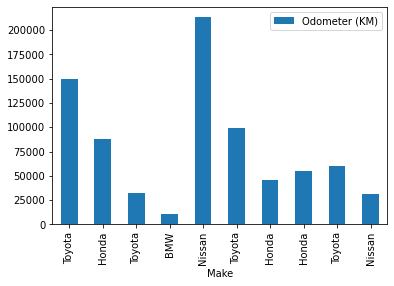

In [50]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');

## Histograms

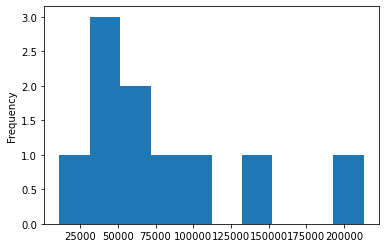

In [52]:
car_sales["Odometer (KM)"].plot.hist();

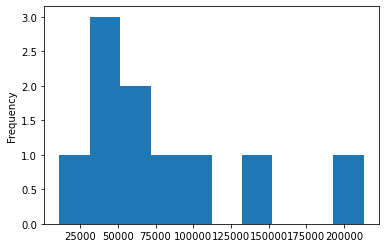

In [53]:
car_sales["Odometer (KM)"].plot(kind="hist");

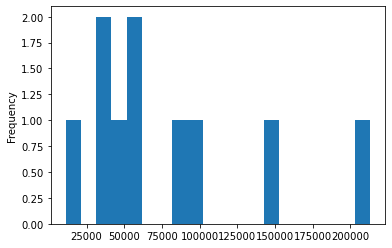

In [54]:
# Default number of bins is 10 
car_sales["Odometer (KM)"].plot.hist(bins=20);

In [62]:
# Let's try with another dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


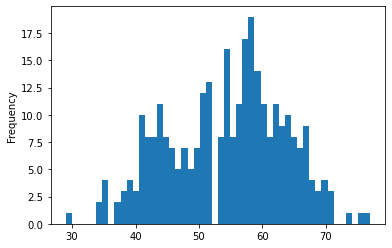

In [66]:
heart_disease["age"].plot(kind="hist",bins=50);

## Subplots
- Concept
- DataFrame

In [67]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


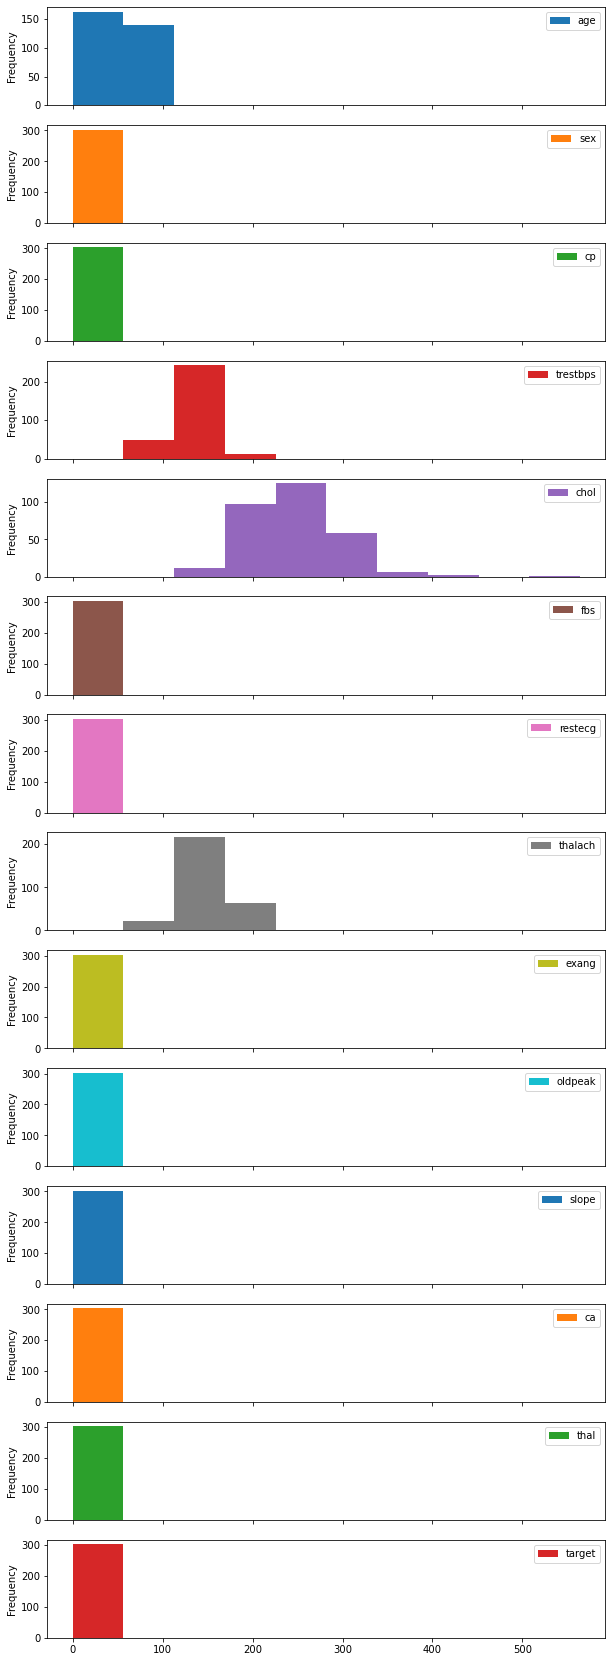

In [70]:
heart_disease.plot.hist(figsize=(10,30),subplots=True);